In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("data/Dataset (88 points).xlsx")
df.head()

,Catalyst,Synthesis technique,ZIF 8 growth temp (°C),Synthesis duration (hrs),Catalyst loading (mg/cm2),Cell,Flowrate (mL/min),Electrolyte,pH,pH.1,Electrode/Substrate,Potential,Current density (mA/cm2),FE (CO),Morphology
0,ZIF-8,prototypical synthesis,25,24.0,35.21,H-type,20,0.5 M KHCO3,7.2,7.2,glassy carbon,-1.3,-1.15,0.41,cubic
1,ZIF-8,prototypical synthesis,25,24.0,35.21,H-type,20,0.5 M KHCO3,7.2,7.2,glassy carbon,-1.4,-1.35,0.52,cubic
2,ZIF-8,prototypical synthesis,25,24.0,35.21,H-type,20,0.5 M KHCO3,7.2,7.2,glassy carbon,-1.5,-5.00,0.92,cubic
3,ZIF-8,prototypical synthesis,25,24.0,35.21,H-type,20,0.5 M KHCO3,7.2,7.2,glassy carbon,-1.6,-8.50,0.90,cubic
4,ZIF-8,prototypical synthesis,25,24.0,35.21,H-type,20,0.5 M KHCO3,7.2,7.2,glassy carbon,-1.7,-12.50,0.62,cubic


In [3]:
df.shape

(88, 15)

In [4]:
df.columns

Index(['Catalyst', 'Synthesis technique', 'ZIF 8 growth temp (°C)',
       'Synthesis duration (hrs)', 'Catalyst loading (mg/cm2)', 'Cell',
       'Flowrate (mL/min)', 'Electrolyte', 'pH', 'pH.1', 'Electrode/Substrate',
       'Potential', 'Current density (mA/cm2)', 'FE (CO)', 'Morphology'],
      dtype='object')

In [5]:
# Replace all spaces with underscores in all DataFrame values
df = df.applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)

In [6]:
df.head()

,Catalyst,Synthesis technique,ZIF 8 growth temp (°C),Synthesis duration (hrs),Catalyst loading (mg/cm2),Cell,Flowrate (mL/min),Electrolyte,pH,pH.1,Electrode/Substrate,Potential,Current density (mA/cm2),FE (CO),Morphology
0,ZIF-8,prototypical_synthesis,25,24.0,35.21,H-type,20,0.5_M_KHCO3,7.2,7.2,glassy_carbon,-1.3,-1.15,0.41,cubic
1,ZIF-8,prototypical_synthesis,25,24.0,35.21,H-type,20,0.5_M_KHCO3,7.2,7.2,glassy_carbon,-1.4,-1.35,0.52,cubic
2,ZIF-8,prototypical_synthesis,25,24.0,35.21,H-type,20,0.5_M_KHCO3,7.2,7.2,glassy_carbon,-1.5,-5.00,0.92,cubic
3,ZIF-8,prototypical_synthesis,25,24.0,35.21,H-type,20,0.5_M_KHCO3,7.2,7.2,glassy_carbon,-1.6,-8.50,0.90,cubic
4,ZIF-8,prototypical_synthesis,25,24.0,35.21,H-type,20,0.5_M_KHCO3,7.2,7.2,glassy_carbon,-1.7,-12.50,0.62,cubic


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the columns to label encode
columns_to_encode = ['Synthesis technique', 'Cell', 'Electrolyte', 'Electrode/Substrate', 'Morphology']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each specified column
for column in columns_to_encode:
    if column in df.columns:  # Check if the column exists in the DataFrame
        df[column] = encoder.fit_transform(df[column])

In [8]:
# Drop the 'Material' column permanently
df.drop(columns=['Catalyst', 'pH.1', 'pH'], inplace=True)
df.head()

,Synthesis technique,ZIF 8 growth temp (°C),Synthesis duration (hrs),Catalyst loading (mg/cm2),Cell,Flowrate (mL/min),Electrolyte,Electrode/Substrate,Potential,Current density (mA/cm2),FE (CO),Morphology
0,3,25,24.0,35.21,0,20,2,1,-1.3,-1.15,0.41,0
1,3,25,24.0,35.21,0,20,2,1,-1.4,-1.35,0.52,0
2,3,25,24.0,35.21,0,20,2,1,-1.5,-5.00,0.92,0
3,3,25,24.0,35.21,0,20,2,1,-1.6,-8.50,0.90,0
4,3,25,24.0,35.21,0,20,2,1,-1.7,-12.50,0.62,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Synthesis technique        88 non-null     int64  
 1   ZIF 8 growth temp (°C)     88 non-null     int64  
 2   Synthesis duration (hrs)   88 non-null     float64
 3   Catalyst loading (mg/cm2)  88 non-null     float64
 4   Cell                       88 non-null     int64  
 5   Flowrate (mL/min)          88 non-null     int64  
 6   Electrolyte                88 non-null     int64  
 7   Electrode/Substrate        88 non-null     int64  
 8   Potential                  88 non-null     float64
 9   Current density (mA/cm2)   88 non-null     float64
 10  FE (CO)                    88 non-null     float64
 11  Morphology                 88 non-null     int64  
dtypes: float64(5), int64(7)
memory usage: 8.4 KB


In [10]:
df.describe()

,Synthesis technique,ZIF 8 growth temp (°C),Synthesis duration (hrs),Catalyst loading (mg/cm2),Cell,Flowrate (mL/min),Electrolyte,Electrode/Substrate,Potential,Current density (mA/cm2),FE (CO),Morphology
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.840909,46.590909,12.242424,7.128182,0.272727,17.500000,3.534091,0.272727,-1.158523,-5.781818,0.370000,0.545455
std,0.992922,40.039818,9.560368,9.168262,0.447914,7.005745,2.444552,0.447914,0.365402,16.282805,0.210773,0.500783
min,0.000000,25.000000,0.083333,1.000000,0.000000,9.000000,0.000000,0.000000,-2.000000,-61.000000,0.010000,0.000000
25%,3.000000,25.000000,3.000000,1.450000,0.000000,10.000000,2.000000,0.000000,-1.400000,-5.250000,0.207500,0.000000
50%,3.000000,25.000000,10.000000,2.500000,0.000000,20.000000,3.000000,0.000000,-1.100000,-1.175000,0.390000,1.000000
75%,3.000000,25.000000,24.000000,14.140000,1.000000,20.000000,6.000000,1.000000,-0.900000,1.825000,0.500000,1.000000
max,4.000000,120.000000,24.000000,35.210000,1.000000,40.000000,7.000000,1.000000,-0.500000,25.000000,0.920000,1.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Synthesis technique,0
ZIF 8 growth temp (°C),0
Synthesis duration (hrs),0
Catalyst loading (mg/cm2),0
Cell,0
Flowrate (mL/min),0
Electrolyte,0
Electrode/Substrate,0
Potential,0
Current density (mA/cm2),0


In [13]:
df.dtypes

,0
Synthesis technique,int64
ZIF 8 growth temp (°C),int64
Synthesis duration (hrs),float64
Catalyst loading (mg/cm2),float64
Cell,int64
Flowrate (mL/min),int64
Electrolyte,int64
Electrode/Substrate,int64
Potential,float64
Current density (mA/cm2),float64


In [14]:
df.nunique()

,0
Synthesis technique,5
ZIF 8 growth temp (°C),2
Synthesis duration (hrs),6
Catalyst loading (mg/cm2),8
Cell,2
Flowrate (mL/min),4
Electrolyte,8
Electrode/Substrate,2
Potential,19
Current density (mA/cm2),58


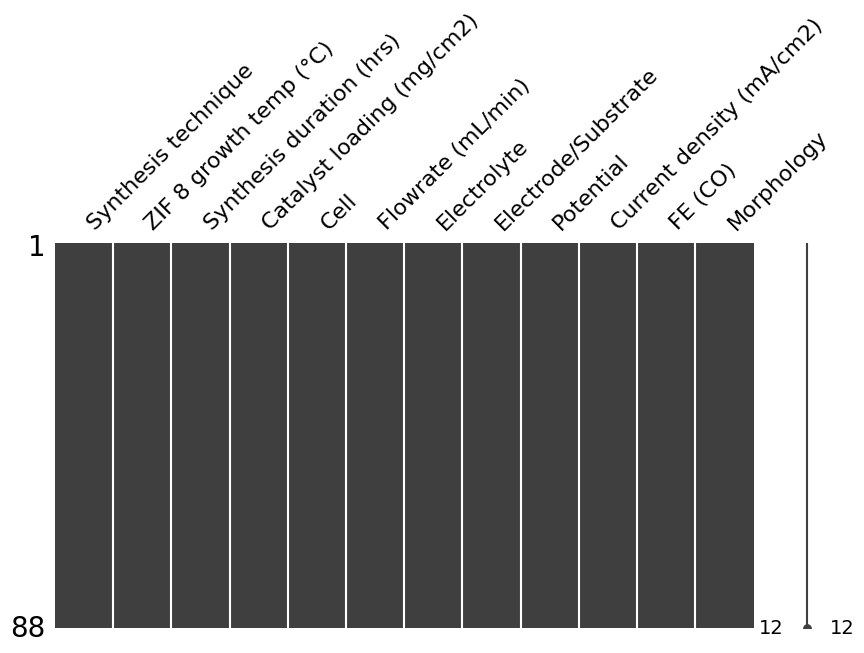

In [15]:
import matplotlib.pyplot as plt
import missingno as msno

# Plot missing data matrix with specified figure size
msno.matrix(df, figsize=(10, 5))

plt.show()


In [16]:
df.columns

Index(['Synthesis technique', 'ZIF 8 growth temp (°C)',
       'Synthesis duration (hrs)', 'Catalyst loading (mg/cm2)', 'Cell',
       'Flowrate (mL/min)', 'Electrolyte', 'Electrode/Substrate', 'Potential',
       'Current density (mA/cm2)', 'FE (CO)', 'Morphology'],
      dtype='object')

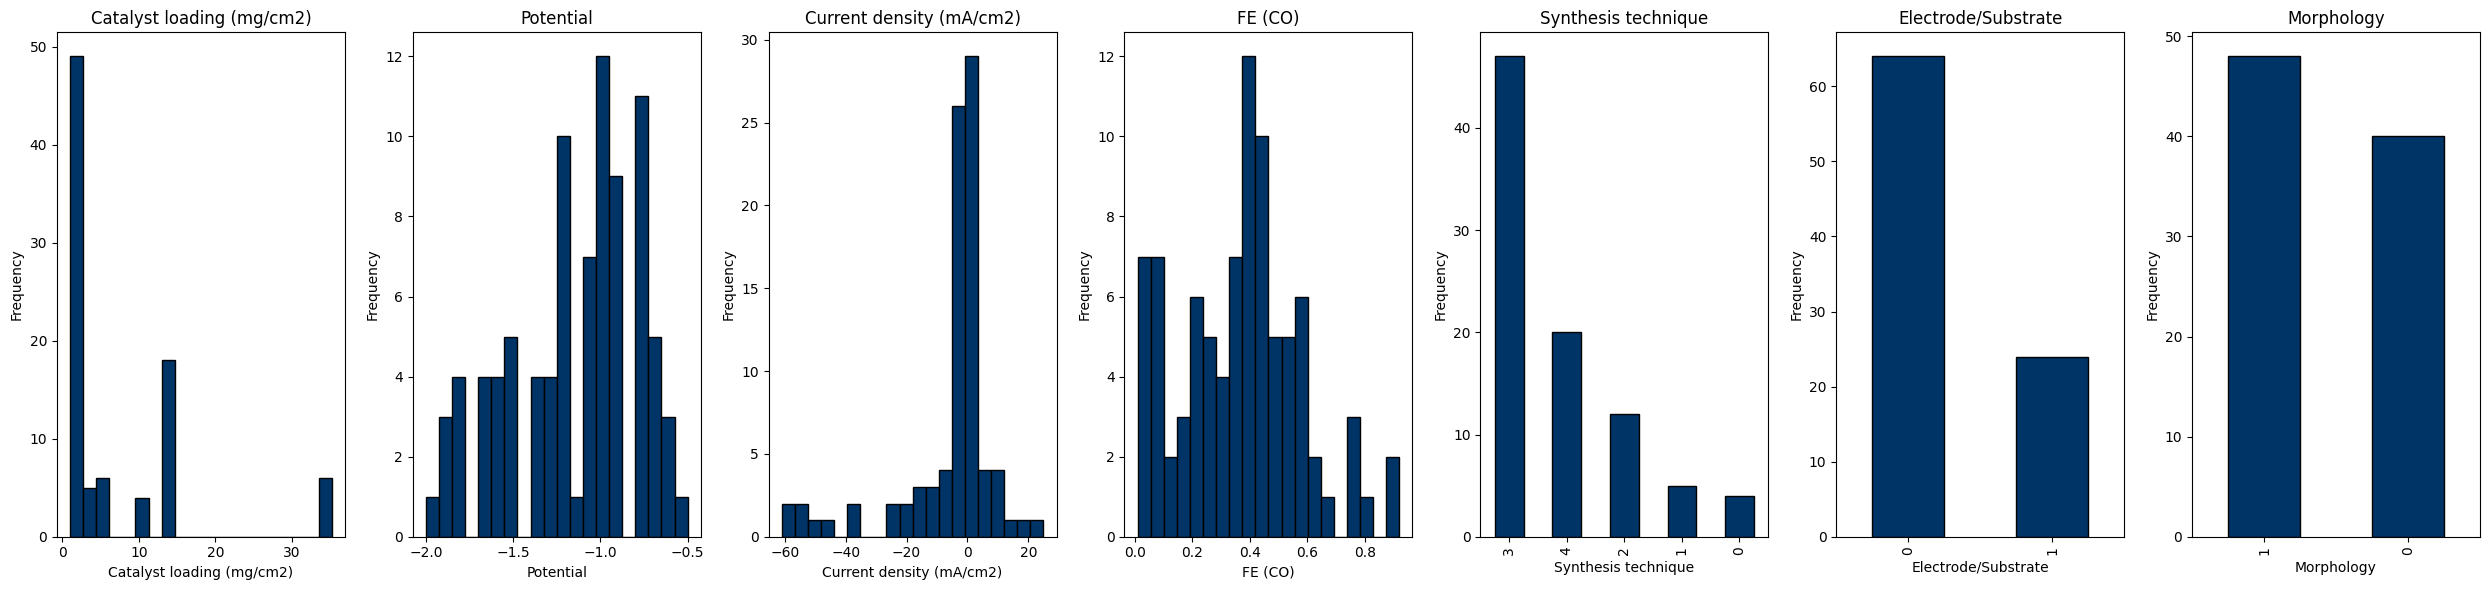

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data

# List of numerical and categorical columns (adjust this as needed)
numerical_columns = [
    'Catalyst loading (mg/cm2)',
    'Potential',
    'Current density (mA/cm2)',
    'FE (CO)'
]

categorical_columns = [
    'Synthesis technique',
    'Electrode/Substrate',
    'Morphology'
]

# Set up the figure size (optional)
plt.figure(figsize=(25, 6))  # Adjusted size for all plots

# Loop through each numerical column and plot a histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns) + len(categorical_columns), i)  # 1 row, multiple columns
    df[col].plot(kind='hist', bins=20, edgecolor='black', color='#003366', title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')


# Loop through each categorical column and plot a bar chart
for i, col in enumerate(categorical_columns, len(numerical_columns) + 1):
    plt.subplot(1, len(numerical_columns) + len(categorical_columns), i)  # 1 row, multiple columns
    df[col].value_counts().plot(kind='bar', edgecolor='black', color='#003366', title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


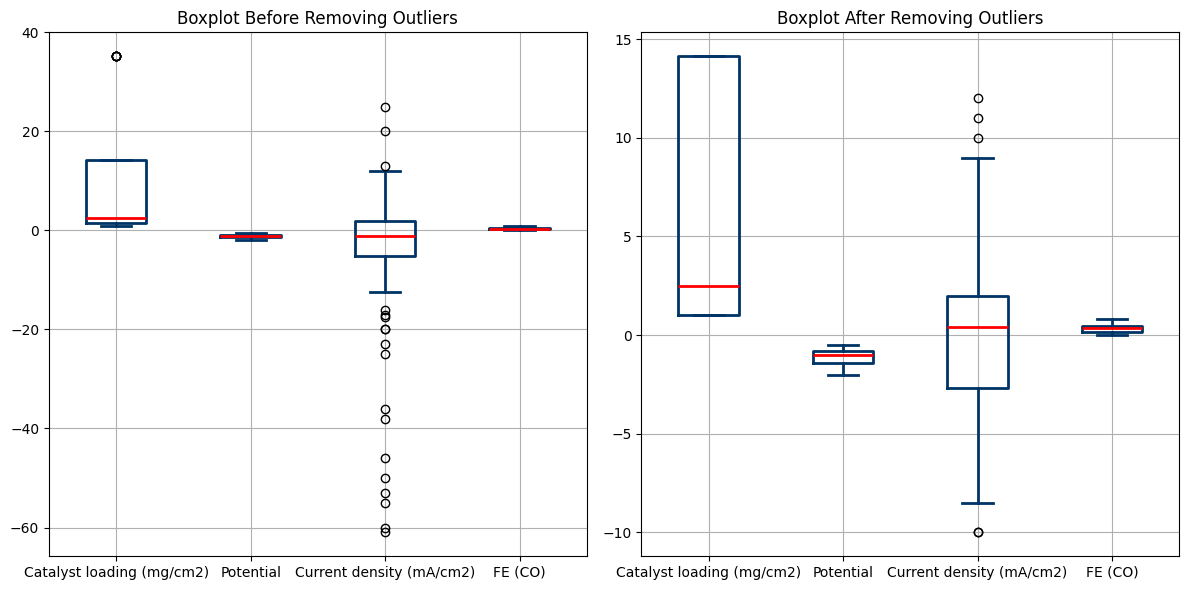

Original data shape: 65
Data shape after outlier removal: 65


In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data

# List of columns to apply outlier removal on
columns_to_extract = [
    'Catalyst loading (mg/cm2)',
    'Potential',
    'Current density (mA/cm2)',
    'FE (CO)'
]

# Plot boxplots before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First plot: Before outlier removal
df[columns_to_extract].boxplot(
    boxprops=dict(color='#003366', linewidth=2),  # Set color for box borders
    medianprops=dict(color='red', linewidth=2),  # Set color for median line
    whiskerprops=dict(color='#003366', linewidth=2),  # Set color for whiskers
    capprops=dict(color='#003366', linewidth=2),  # Set color for caps
)
plt.title("Boxplot Before Removing Outliers")

# Apply Tukey's method to remove outliers directly in df
def remove_outliers_tukey(df, columns):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers directly in df
    df_no_outliers = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_no_outliers

# Remove outliers using Tukey's method and update df
df = remove_outliers_tukey(df, columns_to_extract)

# Plot boxplots after removing outliers
plt.subplot(1, 2, 2)  # Second plot: After outlier removal
df[columns_to_extract].boxplot(
    boxprops=dict(color='#003366', linewidth=2),  # Set color for box borders
    medianprops=dict(color='red', linewidth=2),  # Set color for median line
    whiskerprops=dict(color='#003366', linewidth=2),  # Set color for whiskers
    capprops=dict(color='#003366', linewidth=2),  # Set color for caps
)
plt.title("Boxplot After Removing Outliers")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Optionally, you can print the number of rows before and after outlier removal
print(f"Original data shape: {len(df)}")
print(f"Data shape after outlier removal: {df.shape[0]}")
